In [1]:
# importing required packages for visualization
import pandas as pd
from matplotlib import pyplot as plt
% matplotlib inline
import seaborn as sns

In [2]:
tweet_archive_df = pd.read_csv('twitter_archive_master.csv')
tweet_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 14 columns):
tweet_id                 1998 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1998 non-null object
source                   1998 non-null object
text                     1998 non-null object
expanded_urls            1998 non-null object
rating_numerator         1998 non-null float64
rating_denominator       1998 non-null float64
name                     1998 non-null object
id                       1998 non-null int64
retweet_count            1998 non-null int64
favorite_count           1998 non-null int64
dog_stage                1998 non-null object
dtypes: float64(4), int64(4), object(6)
memory usage: 218.6+ KB


In [3]:
image_pred_df = pd.read_csv('image-predictions.tsv',sep='\t')
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Visualizing
- Lets start with how are retweet and favorite counts are related. Common sense says they need to be directly related to each other

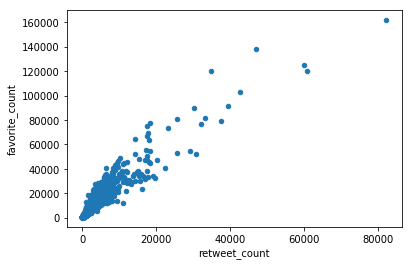

In [6]:
tweet_archive_df[['retweet_count','favorite_count']].plot(x='retweet_count',y='favorite_count',kind='scatter')

And yes, they do look like they are positively correlated

#### Visualizing favorite counts against different dog stages

[Text(0,0.5,'Favorited'), Text(0.5,0,'Dog Stages')]

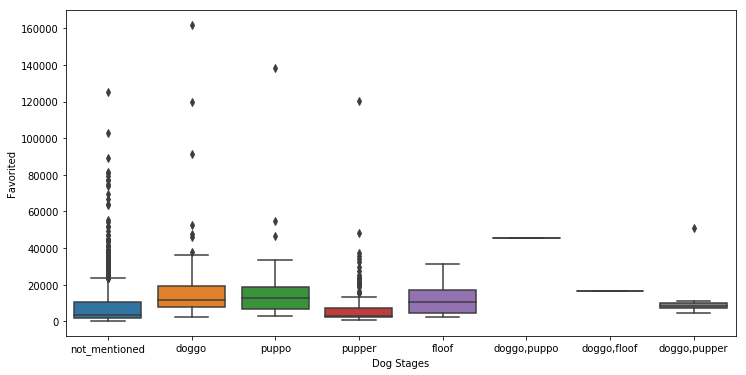

In [20]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='dog_stage',y='favorite_count',data = tweet_archive_df);
ax.set(xlabel='Dog Stages', ylabel='Favorited')

We can see that the last three categories (more than 1 dog stage) have very few occurances. Leaving them out of the analysis, I get this:

[Text(0,0.5,'Favorited'), Text(0.5,0,'Dog Stages')]

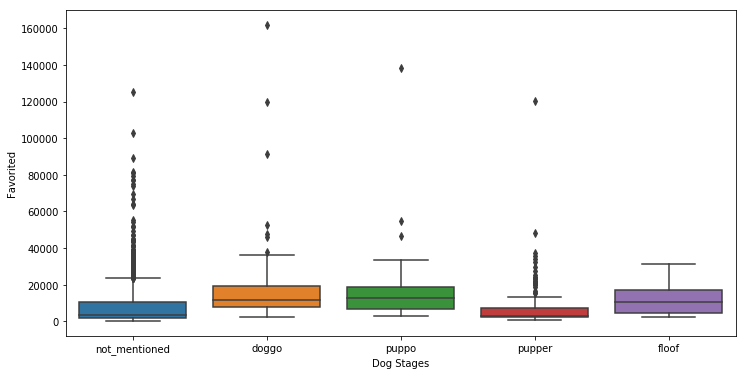

In [23]:
c = tweet_archive_df[-tweet_archive_df.dog_stage.isin(['doggo,puppo','doggo,floof','doggo,pupper'])]
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='dog_stage',y='favorite_count',data = c);
ax.set(xlabel='Dog Stages', ylabel='Favorited')

If no dog stage is mentioned, the favorite count is lower than if some dog stage is mentioned

In [35]:
c = tweet_archive_df[-tweet_archive_df.dog_stage.isin(['doggo,puppo','doggo,floof','doggo,pupper'])]
c.groupby('dog_stage').mean()[['favorite_count']].sort_values('favorite_count',ascending=False)

,favorite_count
dog_stage,
puppo,21492.045455
doggo,19812.238095
floof,12496.714286
not_mentioned,8088.511806
pupper,6956.014925


Except pupper, we can see that all other dog stages have mean favorite count greater than if nothing was mentioned

In [38]:
c = tweet_archive_df[-tweet_archive_df.dog_stage.isin(['doggo,puppo','doggo,floof','doggo,pupper'])]
c.groupby('dog_stage').median()[['favorite_count']].sort_values('favorite_count',ascending=False)

,favorite_count
dog_stage,
puppo,12724.5
doggo,11660.0
floof,10603.0
not_mentioned,3646.5
pupper,3083.0


From the box plot above, it looks like the favorite counts are skewed to towards the higher side. Hence I think the median would be a better measure

## Lets compare the same for retweets now

[Text(0,0.5,'Retweeted'), Text(0.5,0,'Dog Stages')]

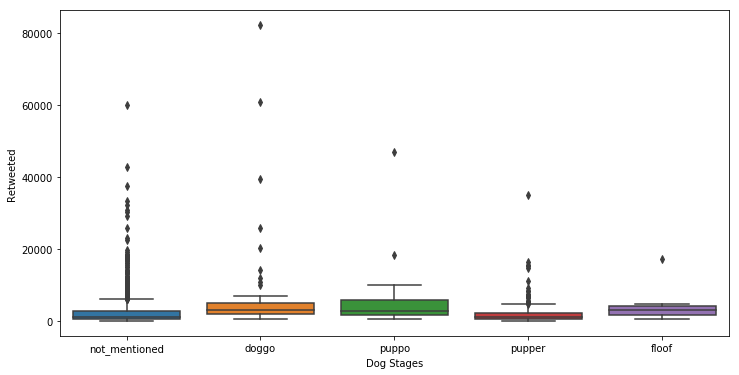

In [39]:
c = tweet_archive_df[-tweet_archive_df.dog_stage.isin(['doggo,puppo','doggo,floof','doggo,pupper'])]
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='dog_stage',y='retweet_count',data = c);
ax.set(xlabel='Dog Stages', ylabel='Retweeted')

In [40]:
c = tweet_archive_df[-tweet_archive_df.dog_stage.isin(['doggo,puppo','doggo,floof','doggo,pupper'])]
c.groupby('dog_stage').size()

dog_stage
doggo              63
floof               7
not_mentioned    1694
pupper            201
puppo              22
dtype: int64

## Exploring the image predictions dataset

In [26]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
image_pred_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Maltese_dog                   18
Eskimo_dog                    18
teddy                         18
Shetland_sheepdog             18
beagle                        18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

We can see that the most common dogs that are rated are **Golden Retriever** and **Labrador Retriever**